# Week 10: Sentiment Analysis

Our task this week is as follows:
* Learn about sentiment analysis, and learn how to use the sentiment analysis package in TextBlob
* Load a novel into a dataframe, sentence by sentence.
* Record the sentiment values for each sentence in that dataframe
* Extract the sentences identified as the "happiest" and the "saddest" by the sentiment analysis system
* Plot the raw values for sentiment in the novel

# Sentiment Analysis demo

Before we get into how to use TextBlob, let's play around with sentiment analysis a little bit, shall we?

## TextBlob (Default, Lexicon-based)

The [documentation for TextBlob](https://textblob.readthedocs.io/en/dev/) isn't the best, but the default sentiment system is based on a tool called [pattern](https://github.com/clips/pattern), which employs a sentiment lexicon — a list of words with values, many of them hand-coded. 
- You can see the source code [here](https://github.com/sloria/TextBlob/blob/6396e24e85af7462cbed648fee21db5082a1f3fb/textblob/en/__init__.py#L8) (around line 80): it basically averages the sentiment scores for the all the words in the span, and applies some rule-based heuristics to identify negations. 
- You can see the full lexicon [here](https://github.com/sloria/TextBlob/blob/6396e24e85af7462cbed648fee21db5082a1f3fb/textblob/en/en-sentiment.xml); it's mostly adjective-based. 

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("Neil Young is the greatest artist to come out of this country").polarity

In [ ]:
TextBlob("I don't hate Neil Young and his stupid, whiny voice").polarity

In [ ]:
TextBlob("Sometimes I feel like Neil Young is the greatest singer of his generation").polarity

In [ ]:
TextBlob("Neil Old isn’t the worst Canadian musician").polarity

In [ ]:
TextBlob("Oh yeah, Neil Young’s voice is as lovely as Josh Groban’s").polarity

In [ ]:
TextBlob("Hating on amazing music isn’t something I’m known for").polarity

In [ ]:
TextBlob("Neil Young").polarity

In [ ]:
TextBlob("That would be the greatest misfortune of all").polarity

## TextBlob (Naive Bayes Classifier)

TextBlob has a second sentiment system, which uses a machine learning approach: a naive Bayes classifier trained on a set of movie reviews. 

TextBlob actually allows us to make our OWN naive Bayes classifiers... so let's make one to get a sense of how they work. (This example is from Nick Montfort's book *Exploratory Programming for the Arts and Humanities*, and it follows TextBlob's [tutorial "Building a Text Classification system"](https://textblob.readthedocs.io/en/dev/classifiers.html).)

First, we create our "training data" — a list containing a bunch of *tuples*, which are like two-item mini lists, each of which here contains some text and a label, `pos` or `neg`. Then we run the classifier on this training data.

In [ ]:
sentiments = [
    ('Wittgenstein wrote one of the greatest philosophical works ever, an incredible contribution.', 'pos'),
    ('The Oulipo is a radical, pioneering group that has shaped literary history.', 'pos'),
    ('What an awesome sunset.', 'pos'),
    ('I love it!', 'pos'),
    ('Very good plan.', 'pos'),
    ('The final season of Game of Thrones made my eyes bleed.', 'neg'),
    ('Movies based on DC comic books are extremely tiresome.', 'neg'),
    ('That is a horrible idea.', 'neg'),
    ('I hate that sort of thing.', 'neg'),
    ('You lack imagination.', 'neg')]

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(sentiments)

TextBlob will tell us what it considers the "most infortmative features" (aka words) in our training data. What do you think they will be?

In [ ]:
cl.show_informative_features(10)

In [ ]:
cl.classify("Neil Young is the greatest artist to come out of this country")

In [ ]:
cl.classify("I hate Neil Young and his stupid, whiny voice.")

In [ ]:
cl.classify("Hating on amazing music isn’t something I’m known for.")

To use TextBlob's sentiment system based on a naive Bayes classifier model of a [movie reviews dataset](hhttp://www.cs.cornell.edu/people/pabo/movie-review-data/), we need to import it and then pass the `analyzer=NaiveBayesAnalyzer()` parameter to the commands we used above.

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
TextBlob("Neil Young is the greatest artist to come out of this country", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("I hate Neil Young and his stupid, whiny voice.", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Sometimes I feel like Neil Young is the greatest singer of his generation", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Neil Young isn’t the worst Canadian musician", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Oh yeah, Neil Young’s voice is as lovely as Josh Groban’s", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("Hating on amazing music isn’t something I’m known for", analyzer=NaiveBayesAnalyzer()).sentiment

In [ ]:
TextBlob("That would be the greatest misfortune of all", analyzer=NaiveBayesAnalyzer()).sentiment

# Meet TextBlob!

Okay, let's now properly meet TextBlob: a Python library specifically designed for working with text. As you'll see, it does very easily a lot of things that we've been doing the hard way. But we did need to learn how to program in Python!

Let's start by importing TextBlob, which we accomplish as follows:

In [1]:
from textblob import TextBlob

The way we work with TextBlob is first by "blobbing" a string of text (aka, turning it from a string to a TextBlob object). This is done by passing the string as argument to the `TextBlob` function.

In [2]:
text = "It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife."

In [3]:
pride_blob = TextBlob(text)

In [4]:
type(pride_blob)

textblob.blob.TextBlob

# Using TextBlob to Tokenize Strings and Split Them Into Sentences

Once a text is blobbed, we can start calling the special TextBlob methods on it. Note that TextBlob methods don't take arguments, and indeed don't even have the usual method syntax of being followed by `()` — which I personally find a bit ugly.

Let's look at two to start with:
- `blob.words`: This tokenizes the string, turning into words. We've been accomplishing this with Python's built-in `string.split()` for many weeks now, then doing some extra stuff like removing punctuation with regular expressions. TextBlob does it all in one fell swoop, and does a good job with it — although we get less control over the process, and I personally prefer our previous method (can you see why??). The object it returns behaves like a `list`.
- `blob.sentences`: This returns all the sentences in a string. We've been accomplishing this with `string.split(".")`. This does exactly the same thing, from what I can tell; for instance, it isn't smart enough to also split on `?` or `!`, and it is just as confused by contractions like `per cent.`. The object it returns again behaves like a `list`'

In [5]:
pride_blob.words()

TypeError: 'WordList' object is not callable

In [6]:
pride_blob.words

WordList(['It', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife'])

In [7]:
type(pride_blob.words)

textblob.blob.WordList

In [8]:
pride_blob.words[0]

'It'

In [9]:
for word in pride_blob.words:
    print(word.upper())

IT
IS
A
TRUTH
UNIVERSALLY
ACKNOWLEDGED
THAT
A
SINGLE
MAN
IN
POSSESSION
OF
A
GOOD
FORTUNE
MUST
BE
IN
WANT
OF
A
WIFE


In [10]:
sot4 = open("sign-of-four.txt", encoding="utf-8").read()

In [14]:
sot4.words

AttributeError: 'str' object has no attribute 'words'

In [12]:
sot4_blob = TextBlob(sot4)

In [13]:
type(sot4_blob)

textblob.blob.TextBlob

In [15]:
sot4_blob.words[255:269]

WordList(['“', 'Which', 'is', 'it', 'to-day', '”', 'I', 'asked', '—', '“', 'morphine', 'or', 'cocaine', '”'])

In [16]:
len(sot4_blob.words)

45621

In [17]:
sot4_blob.sentences[9:20]

[Sentence("“Which is it to-day?” I asked,—“morphine or cocaine?”
 
 He raised his eyes languidly from the old black-letter volume which he had opened."),
 Sentence("“It is cocaine,” he said,—“a seven-per-cent."),
 Sentence("solution."),
 Sentence("Would you care to try it?”
 
 “No, indeed,” I answered, brusquely."),
 Sentence("“My constitution has not got over the Afghan campaign yet."),
 Sentence("I cannot afford to throw any extra strain upon it.”
 
 He smiled at my vehemence."),
 Sentence("“Perhaps you are right, Watson,” he said."),
 Sentence("“I suppose that its influence is physically a bad one."),
 Sentence("I find it, however, so transcendently stimulating and clarifying to the mind that its secondary action is a matter of small moment.”
 
 “But consider!” I said, earnestly."),
 Sentence("“Count the cost!"),
 Sentence("Your brain may, as you say, be roused and excited, but it is a pathological and morbid process, which involves increased tissue-change and may at last leave a pe

# TextBlob Word Counts... and Python Dictionaries

TextBlob has another use method, `blob.word_counts`, which returns a list of the most commonly used terms in a document, along with a count for each of those words.

In [18]:
pride_blob.word_counts

defaultdict(int,
            {'it': 1,
             'is': 1,
             'a': 4,
             'truth': 1,
             'universally': 1,
             'acknowledged': 1,
             'that': 1,
             'single': 1,
             'man': 1,
             'in': 2,
             'possession': 1,
             'of': 2,
             'good': 1,
             'fortune': 1,
             'must': 1,
             'be': 1,
             'want': 1,
             'wife': 1})

In [19]:
sot4_blob.word_counts

defaultdict(int,
            {'chapter': 12,
             'i': 1234,
             'the': 2327,
             'science': 2,
             'of': 1121,
             'deduction': 6,
             'sherlock': 34,
             'holmes': 133,
             'took': 37,
             'his': 478,
             'bottle': 1,
             'from': 161,
             'corner': 16,
             'mantel-piece': 1,
             'and': 1176,
             'hypodermic': 1,
             'syringe': 1,
             'its': 21,
             'neat': 2,
             'morocco': 1,
             'case': 45,
             'with': 383,
             'long': 45,
             'white': 37,
             'nervous': 4,
             'fingers': 3,
             'he': 644,
             'adjusted': 1,
             'delicate': 4,
             'needle': 1,
             'rolled': 2,
             'back': 63,
             'left': 43,
             'shirt-cuff': 1,
             'for': 292,
             'some': 108,
             'little': 88,
  

Above, I called that a "list" of all the words in the strings, along with word counts... But in terms of the **Python data type** returned by the `blob.words_counts` method — well, that's not a `list` at all, but rather a **dictionary (`dict`)**... a data type we've been skirting around for a few weeks now.

We used **dictionaries** in the Week 8 Supplemental Lecture to generate our `gender_signal` column, and you played around with them in the Week 8 lecture. But now it's time to properly meet them.

## Python Dictionaries

As [Melanie Walsh explains](https://melaniewalsh.github.io/Intro-Cultural-Analytics/02-Python/11-Dictionaries.html), dictionaries are mainly differentiated from `list`s by their use of **key-value pairs**. Whereas we access items in a list by their index position, we access the **values** of items in a dictionary by their **key**. 

Python dictionaries are always surrounded by curly brackets `{ }`. You can make a dictionary in this manner:

```
variable_name = {
   'key1': value1,
   'key2': value2,
   'key3': value3,
}
```

Note:
- Keys are `string`s; values can be of any data type.
- Note that a `,` comes between each key-value pair your define
- You don't need to arrange things like this typographically, with key-values pairs each on their own line, but it does make things look prettier

In [20]:
carnivores = {
    'python': 'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation',
    'panda': 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo',
    'blob': 'amoeboidal alien that envelops living beings, asphyxiating them'
}

In [21]:
type(carnivores)

dict

In [22]:
carnivores

{'python': 'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation',
 'panda': 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo',
 'blob': 'amoeboidal alien that envelops living beings, asphyxiating them'}

In [23]:
carnivores = {'python': 'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation','panda': 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo','blob': 'amoeboidal alien that envelops living beings'}

In [24]:
carnivores

{'python': 'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation',
 'panda': 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo',
 'blob': 'amoeboidal alien that envelops living beings'}

You can see all the keys in a dictionary by calling the `dict.keys()` method, all the values in a dictionary by calling the `dict.values()` method, and all the key-value pairs in a dictionary by calling `dict.items()`.

In [25]:
carnivores.keys()

dict_keys(['python', 'panda', 'blob'])

In [26]:
carnivores.values()

dict_values(['a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation', 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo', 'amoeboidal alien that envelops living beings'])

In [27]:
carnivores.items()

dict_items([('python', 'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation'), ('panda', 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo'), ('blob', 'amoeboidal alien that envelops living beings')])

## Accessing Items in a Dictionary

Similarly to the way that we access items in a list, we can access items in a dictionary with square brackets `[]` and the **key name** of the value we want to extract.

In [28]:
carnivores['python']

'a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation'

In [29]:
carnivores['panda']

'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo'

In [30]:
carnivores['blob']

'amoeboidal alien that envelops living beings'

In [31]:
carnivores['tulip']

KeyError: 'tulip'

## Changing Values and Adding Key-Value Pairs

This is accomplished as follows:

In [32]:
carnivores['blob'] = "a third-party Python library that slowly kills you by sucking up all of your time, because the textual analysis it facilitates is so fascinating"

In [33]:
carnivores['blob']

'a third-party Python library that slowly kills you by sucking up all of your time, because the textual analysis it facilitates is so fascinating'

In [34]:
carnivores['kitten'] = "a delightful, fuzzy creature whose natural prey is cat food (dry or wet) and, especially, treats"

In [35]:
carnivores['kitten']

'a delightful, fuzzy creature whose natural prey is cat food (dry or wet) and, especially, treats'

In [36]:
carnivores.values()

dict_values(['a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation', 'a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo', 'a third-party Python library that slowly kills you by sucking up all of your time, because the textual analysis it facilitates is so fascinating', 'a delightful, fuzzy creature whose natural prey is cat food (dry or wet) and, especially, treats'])

## Nested Dictionaries

I said earlier that the value of a particular key could be any data type... and that includes a dictionary. Yes, you can have dictionaries within dictionaries. Indeed, that's how our name-gender count list works in the `gender_signal` task.

In [37]:
name_counts = {
    'Adam': {'F': 0, 'M': 1},
    'Marta': {'F': 1, 'M': 0},
    'Rosie': {'F': 1, 'M': 0},
    'Jazz': {'F': 1, 'M': 0}
}

In [39]:
type(name_counts['Jazz'])

dict

In [40]:
name_counts['Jazz']['F']

1

## Iterating Through Dictionaries

You can iterate through dictionaries — but first you need to specify, by calling the appropriate method, if you want to iterate over keys, values, of key-value pairs.

In [41]:
for key in carnivores.keys():
    print(f"I am so afraid of {key.upper()}S!!!!")

I am so afraid of PYTHONS!!!!
I am so afraid of PANDAS!!!!
I am so afraid of BLOBS!!!!
I am so afraid of KITTENS!!!!


In [42]:
for value in carnivores.values():
    print(f"Did you know there is a kind of carnivore that is {value}???")

Did you know there is a kind of carnivore that is a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation???
Did you know there is a kind of carnivore that is a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo???
Did you know there is a kind of carnivore that is a third-party Python library that slowly kills you by sucking up all of your time, because the textual analysis it facilitates is so fascinating???
Did you know there is a kind of carnivore that is a delightful, fuzzy creature whose natural prey is cat food (dry or wet) and, especially, treats???


In [43]:
for key, value in carnivores.items():
    print(f"A {key} is {value}")

A python is a large heavy-bodied nonvenomous snake that kills prey by constriction and asphyxiation
A panda is a large bearlike mammal that, while technically a carnivore, is in practice a vegetarian, eating only bamboo
A blob is a third-party Python library that slowly kills you by sucking up all of your time, because the textual analysis it facilitates is so fascinating
A kitten is a delightful, fuzzy creature whose natural prey is cat food (dry or wet) and, especially, treats


## Back to `blob.word_counts`!

So... as I said, TextBlob's `word_counts` method produces a dictionary-like object, in which each key is a unique word in the string, and each value is a count of how many times that word occurs in the string.

In [44]:
sot4_counts = sot4_blob.word_counts

In [45]:
type(sot4_counts)

collections.defaultdict

In [46]:
sot4_counts['cocaine']

4

By the way, since `blob.word_counts` produces a dictionary-like object in which each key is a unique word... can you tell me the one-line command we could use use to calculate the TTR of any TextBlob object?

In [48]:
# We'll figure this one out together...

len(sot4_blob.word_counts) / len(sot4_blob.words) * 100

12.270664825409352

# Sentiment Analysis in TextBlob

Okay, it's finally time to get back to the thing we really want to do in TextBlob: use its sentiment analysis package! 

This is accessible with the `blob.sentiment`, `blob.polarity`, and `blob.subjectivity` methods.

In [49]:
pride_blob.sentiment

Sentiment(polarity=0.20952380952380953, subjectivity=0.27142857142857146)

In [50]:
pride_blob.polarity

0.20952380952380953

In [51]:
pride_blob.subjectivity

0.27142857142857146

Today we are going to focus on sentiment polarity today (how positive or negative, happy or sad, a particular span of text is. 

In [52]:
TextBlob("My life is ruined and I am miserable").polarity

-1.0

In [53]:
TextBlob("My life is amazing and I am overjoyed").polarity

0.6000000000000001

In [54]:
TextBlob("My life is not ruined and I am not miserable").polarity

0.5

In [55]:
TextBlob("My life is not amazing and I am not overjoyed").polarity

-0.30000000000000004

In [56]:
TextBlob("It's kind of like a potato").polarity

0.6

# Creating a DataFrame of Polarity Values for *The Sign of the Four*

We now have pretty much all the pieces in place to accomplish our task: creating a DataFrame in which each row contains a sentence from *The Sign of the Four* and the TextBlob polarity and subjectivity score for that sentence. Let's go!

We will create three parallel lists:
- one containing the text of every sentence, in the form of a `string`
- one containing a polarity value for each sentence, in the form of a `float`
- one containing a subjectivity value for each sentence, also in the form of a `float`

How would we do this, using skills we learned back in the first half of the course?

## Using `blob.sentences`

Let's start by examining the output of TextBlob's `blob.sentences` method more closely, so we get a better sense of how we'll produce our three desired lists.

In [57]:
sot4_sentences_blob = sot4_blob.sentences

In [58]:
type(sot4_sentences_blob)

list

In [59]:
sot4_sentences_blob[22]

Sentence("Why should you, for a mere passing pleasure, risk the loss of those great powers with which you have been endowed?")

In [60]:
type(sot4_sentences_blob[22])

textblob.blob.Sentence

In [61]:
sot4_sentences_blob[22].polarity

0.15000000000000002

In [62]:
sot4_polarities = []

for sentence in sot4_sentences_blob:
    sot4_polarities.append(sentence.polarity)

In [64]:
len(sot4_polarities)

2333

In [65]:
sot4_subjectivities = []

for sentence in sot4_sentences_blob:
    sot4_subjectivities.append(sentence.subjectivity)

In [66]:
sot4_subjectivities[:10]

[0.0, 0.26, 0.5, 0.48981481481481476, 0.5, 0.5, 0.2625, 0.7625, 0.75, 0.2]

In [68]:
type(sot4_sentences_blob[22])

textblob.blob.Sentence

In [69]:
sot4_sentences_blob[22].raw

'Why should you, for a mere passing pleasure, risk the loss of those great powers with which you have been endowed?'

In [70]:
type(sot4_sentences_blob[22].raw)

str

In [71]:
sot4_sentences_blob[0]

Sentence("Chapter I The Science of Deduction


Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case.")

In [72]:
sot4_sentences_blob[0].raw

'Chapter I The Science of Deduction\n\n\nSherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case.'

Since that output is a bit ugly, with all those `\n\n\n`s, let's create our `string` of each sentence in a slightly different way: by using Python's `string.join()` method, which we met wayyyyy back in Week 3 (go look if you don't believe me!). 

Here, we'll use `string.join()` to join together all the `blob.word`s with spaces, which gives us a pretty string to work with.

In [73]:
sot4_sentences_blob[0].words

WordList(['Chapter', 'I', 'The', 'Science', 'of', 'Deduction', 'Sherlock', 'Holmes', 'took', 'his', 'bottle', 'from', 'the', 'corner', 'of', 'the', 'mantel-piece', 'and', 'his', 'hypodermic', 'syringe', 'from', 'its', 'neat', 'morocco', 'case'])

In [74]:
" ".join(sot4_sentences_blob[0].words)

'Chapter I The Science of Deduction Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case'

In [75]:
type(" ".join(sot4_sentences_blob[0].words))

str

In [76]:
sot4_sentences = []

for sentence in sot4_sentences_blob:
    sot4_sentences.append(" ".join(sentence.words))

In [77]:
sot4_sentences[:10]

['Chapter I The Science of Deduction Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case',
 'With his long white nervous fingers he adjusted the delicate needle and rolled back his left shirt-cuff',
 'For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks',
 'Finally he thrust the sharp point home pressed down the tiny piston and sank back into the velvet-lined arm-chair with a long sigh of satisfaction',
 'Three times a day for many months I had witnessed this performance but custom had not reconciled my mind to it',
 'On the contrary from day to day I had become more irritable at the sight and my conscience swelled nightly within me at the thought that I had lacked the courage to protest',
 'Again and again I had registered a vow that I should deliver my soul upon the subject but there was that in the cool nonchalant air of my compa

# Creating a DataFrame from Three Parallel Lists

Okay, we have all the contents of our desired DataFrame.

- A list containing all the sentences of *The Sign of the Four*, in order
- A list containing the polarity values for each of those sentences, in order
- A list containing the subjectivity values for each of those sentences, in order

Our friend Pandas allows us to quite easily make a new DataFrame out of this kind of data, with its `pd.DataFrame()` method.

The `pd.DataFrame()` method takes as its argument... **a dictionary**! (See why we had to finally learn about dictionaries??). It expects this argument to be formatted as follows:

```
new_df = pd.DataFrame(
    {
        'column1': list1,
        'column2': list2,
        'column3': list3
    }
)
```

Of course, you could also write this same command without all the tabs and newlines as follows:

`new_df = pd.DataFrame({'column1': list1, 'column2': list2, 'column3': list3})`


In [78]:
import pandas as pd

In [79]:
sot4_sentence_sentiment_df = pd.DataFrame({
    'sentence': sot4_sentences,
    'polarity': sot4_polarities,
    'subjectivity': sot4_subjectivities
})

In [80]:
sot4_sentence_sentiment_df

,sentence,polarity,subjectivity
0,Chapter I The Science of Deduction Sherlock Ho...,0.000000,0.000000
1,With his long white nervous fingers he adjuste...,-0.070000,0.260000
2,For some little time his eyes rested thoughtfu...,0.106250,0.500000
3,Finally he thrust the sharp point home pressed...,-0.055093,0.489815
4,Three times a day for many months I had witnes...,0.500000,0.500000
...,...,...,...
2328,I shall be as limp as a rag for a week ” “ Str...,0.229167,0.550000
2329,I often think of those lines of old Goethe — S...,0.100000,0.200000
2330,“ By the way à propos of this Norwood business...,0.043750,0.556250
2331,“ You have done all the work in this business,0.000000,0.000000


Let's now have a look at the sentences that TextBlob considers the most positive, as well as the most negative ones...

In [81]:
sot4_sentence_sentiment_df.sort_values(by='polarity', ascending=False)[:15]

,sentence,polarity,subjectivity
1476,“ Even the best of us are thrown off sometimes,1.00,0.30
118,I assure you however that I never even knew th...,1.00,1.00
246,“ What a very attractive woman ” I exclaimed t...,1.00,1.00
1237,Below the bridge there is a perfect labyrinth ...,1.00,1.00
339,He bent a pair of wonderfully penetrating and ...,1.00,1.00
2064,It was best to get it over,1.00,0.30
214,Best quality paper,1.00,0.30
1574,One of our greatest statesmen has said that a ...,1.00,0.65
1541,However if you can catch him I don ’ t see how...,1.00,1.00
165,She was much impressed by your kindness and sk...,1.00,1.00


Pretty hard to read what's in the `Sentence` column! We could export it to a CSV and explore it in Excel or Google Sheets... or we can set this Pandas parameter so that there is no maximum column width, and it will just show us everything!

In [82]:
pd.set_option('display.max_colwidth', 0)

In [83]:
sot4_sentence_sentiment_df.sort_values(by='polarity', ascending=False)[:15]

,sentence,polarity,subjectivity
1476,“ Even the best of us are thrown off sometimes,1.00,0.30
118,I assure you however that I never even knew that you had a brother until you handed me the watch ” “ Then how in the name of all that is wonderful did you get these facts,1.00,1.00
246,“ What a very attractive woman ” I exclaimed turning to my companion,1.00,1.00
1237,Below the bridge there is a perfect labyrinth of landing-places for miles,1.00,1.00
339,He bent a pair of wonderfully penetrating and questioning eyes upon us,1.00,1.00
2064,It was best to get it over,1.00,0.30
214,Best quality paper,1.00,0.30
1574,One of our greatest statesmen has said that a change of work is the best rest,1.00,0.65
1541,However if you can catch him I don ’ t see how I can refuse you an interview with him ” “ That is understood then ” “ Perfectly,1.00,1.00
165,She was much impressed by your kindness and skill ” “ Mrs,1.00,1.00


In [84]:
sot4_sentence_sentiment_df.sort_values(by='polarity', ascending=True)[:15]

,sentence,polarity,subjectivity
686,“ This is terrible ” I said to Holmes,-1.000000,1.000000
456,He was very fearful of going out alone and he always employed two prize-fighters to act as porters at Pondicherry Lodge,-1.000000,1.000000
2086,“ It was all very bad no doubt ” said he,-0.910000,0.866667
599,“ This is too bad of you McMurdo ” he said,-0.875000,0.666667
852,Bad business,-0.875000,0.666667
853,Bad business,-0.875000,0.666667
439,You can not imagine what a terrible fellow he is when he is angry ” “ If we are to go to Norwood it would perhaps be as well to start at once ” I ventured to remark,-0.750000,1.000000
1210,Besides I don ’ t like that wooden-legged man wi ’ his ugly face and outlandish talk,-0.700000,1.000000
480,After all men have been as bad as this and have recovered,-0.700000,0.666667
16,“ I suppose that its influence is physically a bad one,-0.700000,0.666667


## Preview of Next Time: Plotting Polarity Values

Let's quickly do a plot of the polarity values for all the sentences in *The Sign of the Four*. What does this plot tell you? Does it correspond to your sense of the "emotional trajectory" of the novel? What works about it, and what doesn't? How could it be improved? 

<AxesSubplot:>

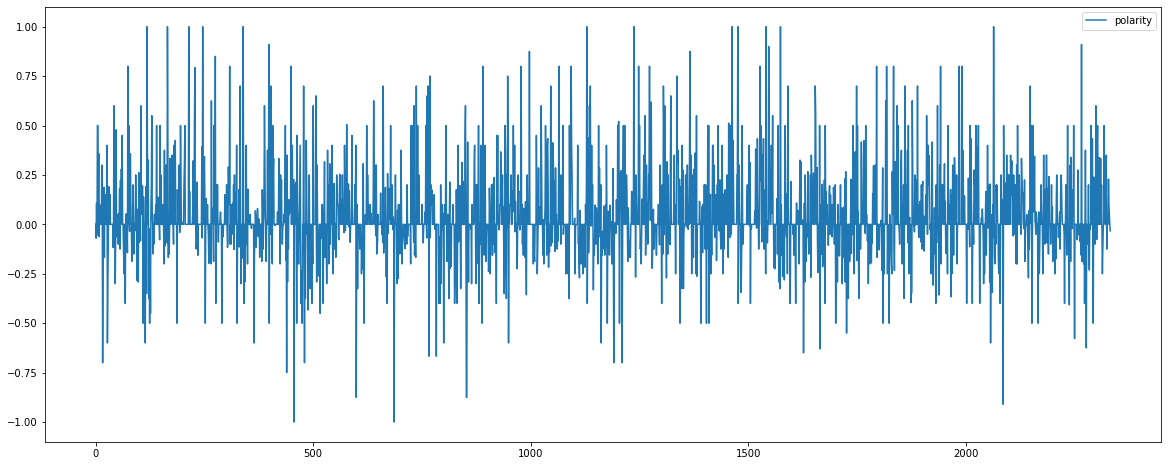

In [86]:
sot4_sentence_sentiment_df[['polarity']].plot(figsize=(20,8))